# Machine Failure (classification Project )
## read the dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import  pandas as pd

In [4]:
df= pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
136424    False
136425    False
136426    False
136427    False
136428    False
Length: 136429, dtype: bool

In [7]:

df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# check the missing value

In [8]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

# Seperate X and Y

In [9]:
x = df.drop(columns=['id','Product ID','Machine failure'])
y= df[['Machine failure']]

In [10]:

x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [11]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


# Cat Con Seperation for X

In [12]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [13]:
cat

['Type']

In [14]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

# Create Sklearn pipeline for feature selection (Ordinal)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [18]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [20]:
pre = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [21]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Type'])])

In [22]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


# Find Mutual Info Scores and plot them (Do not select any columns)

In [23]:
from sklearn.feature_selection import mutual_info_classif

In [24]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre, y)
mi

array([0.00618692, 0.00238454, 0.01948651, 0.01997408, 0.00697723,
       0.00802146, 0.0245703 , 0.01109649, 0.01953247, 0.00136937,
       0.01095635])

In [25]:
mi = pd.Series(mi)
mi.index = x_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024570
num__Torque [Nm]                0.019974
num__OSF                        0.019532
num__Rotational speed [rpm]     0.019487
num__PWF                        0.011096
cat__Type                       0.010956
num__TWF                        0.008021
num__Tool wear [min]            0.006977
num__Air temperature [K]        0.006187
num__Process temperature [K]    0.002385
num__RNF                        0.001369
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

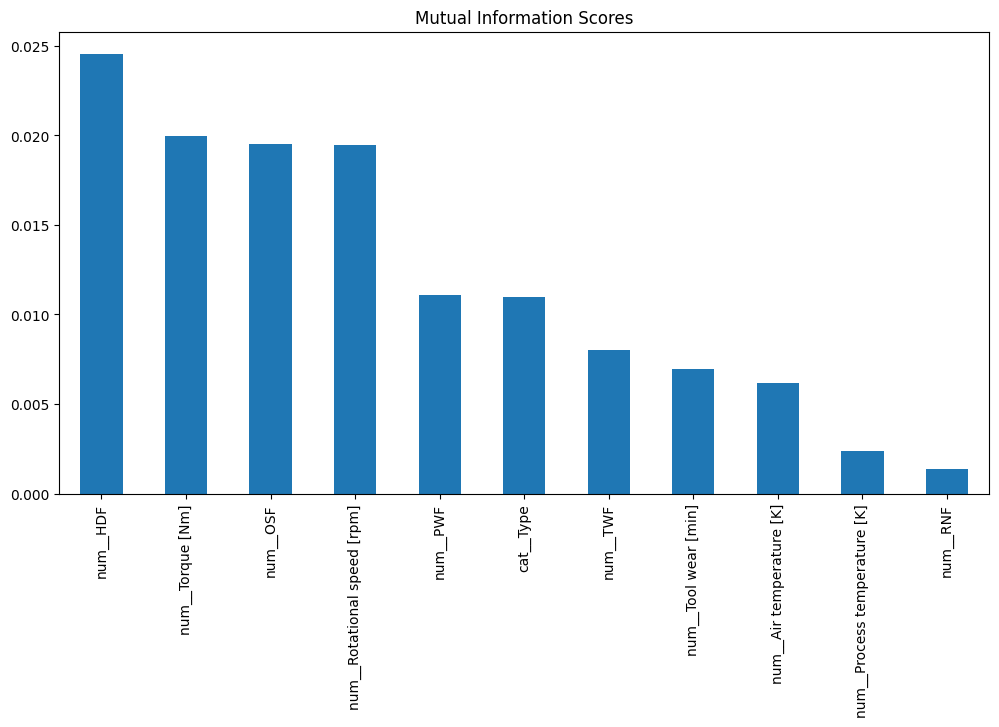

In [26]:
mi.plot(kind='bar', title='Mutual Information Scores', figsize=(12, 6))

In [27]:
# selection top 5 feature
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=5)
sel.fit(x_pre, y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF'], dtype=object)

In [28]:
sel_cols[0].split('__')

['num', 'Rotational speed [rpm]']

In [29]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [30]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [31]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [32]:
x_imp= x[imp_cols]
x_imp

,Rotational speed [rpm],Torque [Nm],HDF,PWF,OSF
0,1596,36.1,0,0,0
1,1759,29.1,0,0,0
2,1805,26.5,0,0,0
3,1524,44.3,0,0,0
4,1641,35.4,0,0,0
...,...,...,...,...,...
136424,1530,37.5,0,0,0
136425,1447,49.1,0,0,0
136426,1524,38.5,0,0,0
136427,1447,46.3,0,0,0


In [33]:
# seperate cat con for selected columns
cat_sel = list(x_imp.columns[x_imp.dtypes=='object'])
con_sel = list(x_imp.columns[x_imp.dtypes!='object'])

In [34]:
cat_sel

[]

In [35]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

# . Build the final sklearn pipeline (Onehotencoder)

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [39]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [40]:
pre2 = ColumnTransformer([('num', num_pipe1, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [41]:
X_sel_pre = pre2.fit_transform(x_imp)
X_sel_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF
0,0.545416,-0.499711,-0.072021,-0.049016,-0.063038
1,1.720308,-1.323028,-0.072021,-0.049016,-0.063038
2,2.051873,-1.628831,-0.072021,-0.049016,-0.063038
3,0.026445,0.464745,-0.072021,-0.049016,-0.063038
4,0.869773,-0.582043,-0.072021,-0.049016,-0.063038


# apply train test split


In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre, y, test_size=0.3, random_state=42)

In [43]:

xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
58494,1.469856,0.331317,-0.744803,0.958735,1.478799,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
75360,-0.516999,0.475704,-0.636684,0.229512,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
131485,-0.141107,-0.823778,-1.025912,0.241274,-0.741172,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
45948,0.073688,0.403510,-0.024010,0.488269,-0.334698,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
105004,0.181085,-0.101844,3.752944,-2.487432,0.650218,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0


In [44]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [45]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [46]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [47]:
xtrain.shape

(95500, 11)

In [48]:
ytrain.shape

(95500, 1)

In [49]:
xtest.shape

(40929, 11)

In [50]:
ytest.shape

(40929, 1)

# Algo Evaluation (Select Best model)

In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [52]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [53]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

#  fit the model and evaluate the result
# evaluate model with f1 score

In [54]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [55]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.8657
Train F1 Cross Validated : 0.9319
Test F1 : 0.8564


Model name : Decision Tree

Train F1 : 0.9950
Train F1 Cross Validated : 0.8726
Test F1 : 0.7307


Model name : Random Forest

Train F1 : 0.9947
Train F1 Cross Validated : 0.9290
Test F1 : 0.8584


Model name : Gradient Boost

Train F1 : 0.8787
Train F1 Cross Validated : 0.9292
Test F1 : 0.8584




# save the result in dataframe

In [56]:
tr

[0.8657493492004464,
 0.9950314673733024,
 0.9947124917382684,
 0.8786764705882353]

In [57]:
ts

[0.8563734290843807,
 0.7306826706676669,
 0.8584149599287623,
 0.8584149599287623]

In [58]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier()}

In [59]:
results_dct = {'Model_name' : list(dct.keys()),
               'Train F1':tr,
               'Test F1':ts,
               'Train F1 CV':tr_cv}

In [60]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.865749,0.856373,0.931864
1,Decision Tree,0.995031,0.730683,0.872580
2,Random Forest,0.994712,0.858415,0.928953
3,Gradient Boost,0.878676,0.858415,0.929153


In [61]:
results_df = results_df.sort_values(by='Test F1', ascending=False)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
2,Random Forest,0.994712,0.858415,0.928953
3,Gradient Boost,0.878676,0.858415,0.929153
0,Logistic,0.865749,0.856373,0.931864
1,Decision Tree,0.995031,0.730683,0.872580


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.001, n_estimators=1, max_depth=2, min_samples_split=5, min_samples_leaf=5)
model.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [63]:
model.score(xtrain, ytrain)

0.9841361256544503

In [65]:
model.score(xtest, ytest)

0.9845341933592319

# Hyperparameter tune the top model

In [66]:
params = {'learning_rate':[0.01, 0.05, 0.1, 0.2],
          'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9, 10]}

In [67]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [68]:
rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'max_depth': 3,
 'learning_rate': 0.1}

In [69]:
rscv.best_score_

0.9312213495145034

In [70]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(min_samples_split=6, n_estimators=10)

# evaluate model performance

In [71]:
best_gbc.score(xtrain, ytrain)

0.9962931937172775

In [72]:
best_gbc.score(xtest, ytest)

0.9961396564782917

In [73]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [74]:

ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [75]:
ytrain.head()

,Machine failure
58494,0
75360,0
131485,0
45948,0
105004,0


In [76]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [77]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


# check the confusion matrix

In [78]:
c = best_gbc.classes_

In [79]:

c

array([0, 1], dtype=int64)

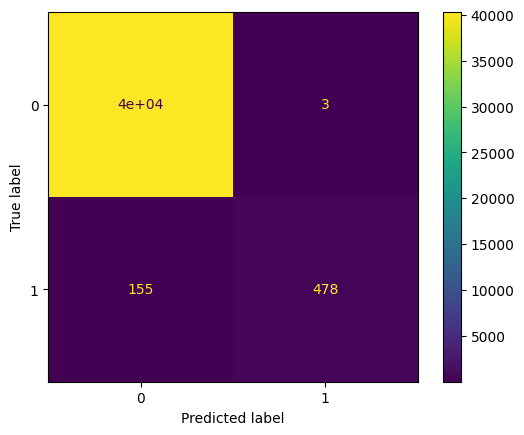

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

# check classification report

In [81]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40296
           1       0.99      0.76      0.86       633

    accuracy                           1.00     40929
   macro avg       0.99      0.88      0.93     40929
weighted avg       1.00      1.00      1.00     40929



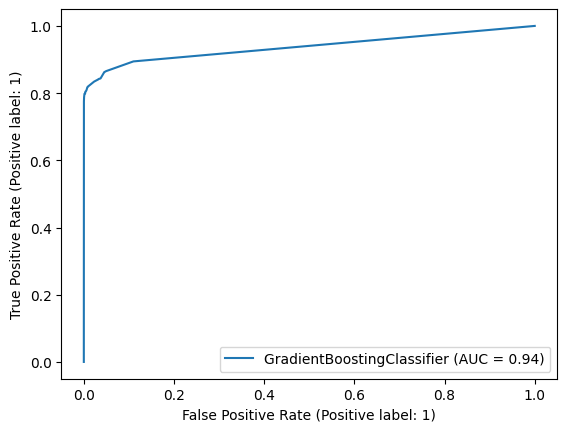

In [82]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_gbc,xtrain, ytrain)

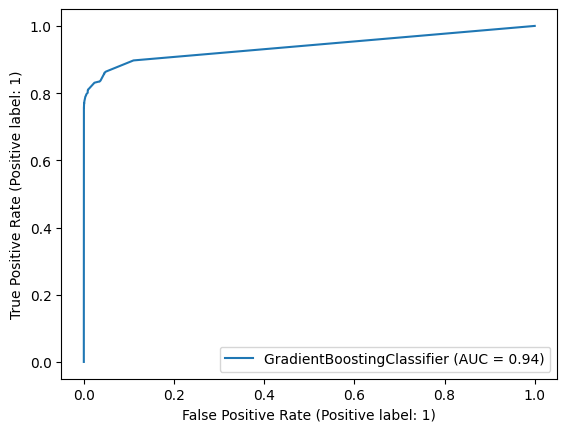

In [83]:
RocCurveDisplay.from_estimator(best_gbc,xtest, ytest)

# predict on out of sample data

In [85]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [86]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Type'])])

In [87]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,1.053251,-0.261872,0.006040,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
90950,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
90951,-2.289058,-2.700806,-0.139337,0.123657,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
90952,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


In [88]:
preds =best_gbc.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
prob = best_gbc.predict_proba(xnew_pre)[:,0]
prob[0:5]

array([0.9919866, 0.9919866, 0.9919866, 0.9919866, 0.9919866])

# save above result in dataframe

In [90]:
df_final = xnew[['Product ID']]
df_final

,Product ID
0,L50896
1,L53866
2,L50498
3,M21232
4,M19751
...,...
90949,L51130
90950,L47783
90951,L48097
90952,L48969


In [91]:
df_final['failure_pred'] = preds 
df_final['failure_prob'] = prob

In [92]:
df_final

,Product ID,failure_pred,failure_prob
0,L50896,0,0.991987
1,L53866,0,0.991987
2,L50498,0,0.991987
3,M21232,0,0.991987
4,M19751,0,0.991987
...,...,...,...
90949,L51130,0,0.991987
90950,L47783,0,0.991987
90951,L48097,0,0.991987
90952,L48969,0,0.991987


In [93]:
df_final['failure_pred'].value_counts()

failure_pred
0    89851
1     1103
Name: count, dtype: int64

<Axes: title={'center': 'Mutual Information Scores'}, xlabel='failure_pred'>

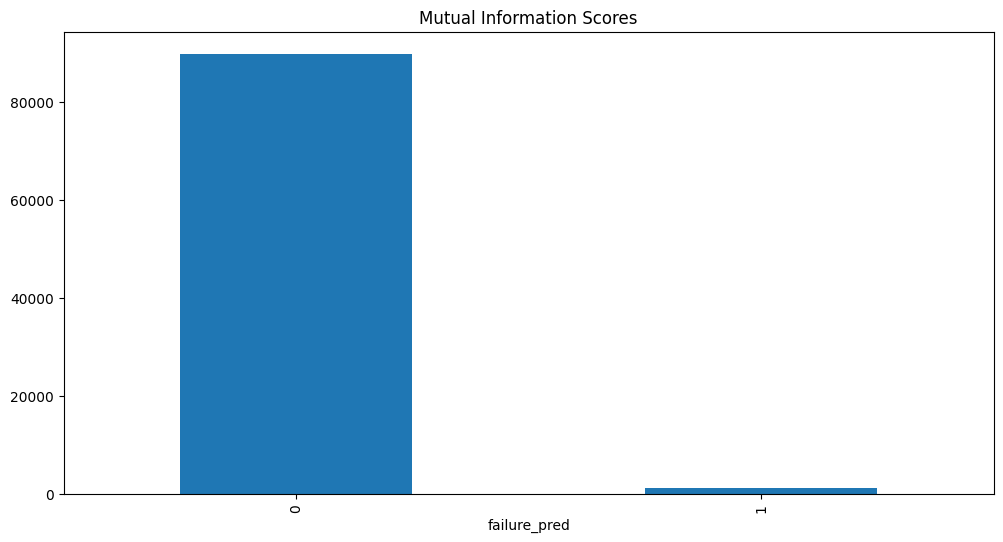

In [94]:
df_final['failure_pred'].value_counts().plot(kind='bar', title='Mutual Information Scores', figsize=(12, 6))

In [95]:
df_final.to_csv('Resultt.csv', index = False)